In [1]:
import pandas as pd
from visualization import *
from data_loader import *
from scipy.stats import chi2_contingency
from PCA import fair_PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
race_cols = ['Race_American_Indian_Alaska_Native',
        'Race_Asian',
        'Race_Black_African_American',
        'Race_Native_Hawaiian_Pacific_Islander',
        'Race_White',
        'Race_White_Latino']

features = ['loan_amount_000s', 'loan_type', 
       'property_type','applicant_income_000s', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units', 
       'number_of_1_to_4_family_units', 'state_code', 'county_code', 'lien_status']

clean_features = ['Loan Amount', 'Loan Type', 'Property Type', 'Applicant Income',
                'Family Income', 'Income Ratio', 'Occupied Units', '1-4 Family Units',
                'State Code', 'County Code', 'Lien Status']

In [3]:
data = data_loader(race_cols, num=100000)
print(len(data))
print(data.race_ethnicity.value_counts())

data = data.dropna(subset=['applicant_income_000s'])
print(len(data))

data = data[data.applicant_income_000s < 10000]
print(len(data))
print(data.race_ethnicity.value_counts())

Loading data...
processed_data.csv exists. Loading data from file.
56469
5    41691
9     5643
3     4959
2     3344
1      528
4      304
Name: race_ethnicity, dtype: int64
54292
54282
5    40233
9     5438
3     4609
2     3221
1      497
4      284
Name: race_ethnicity, dtype: int64


In [4]:
data[data.action_taken == 'Denied'].purchaser_type.value_counts()

0    11003
Name: purchaser_type, dtype: int64

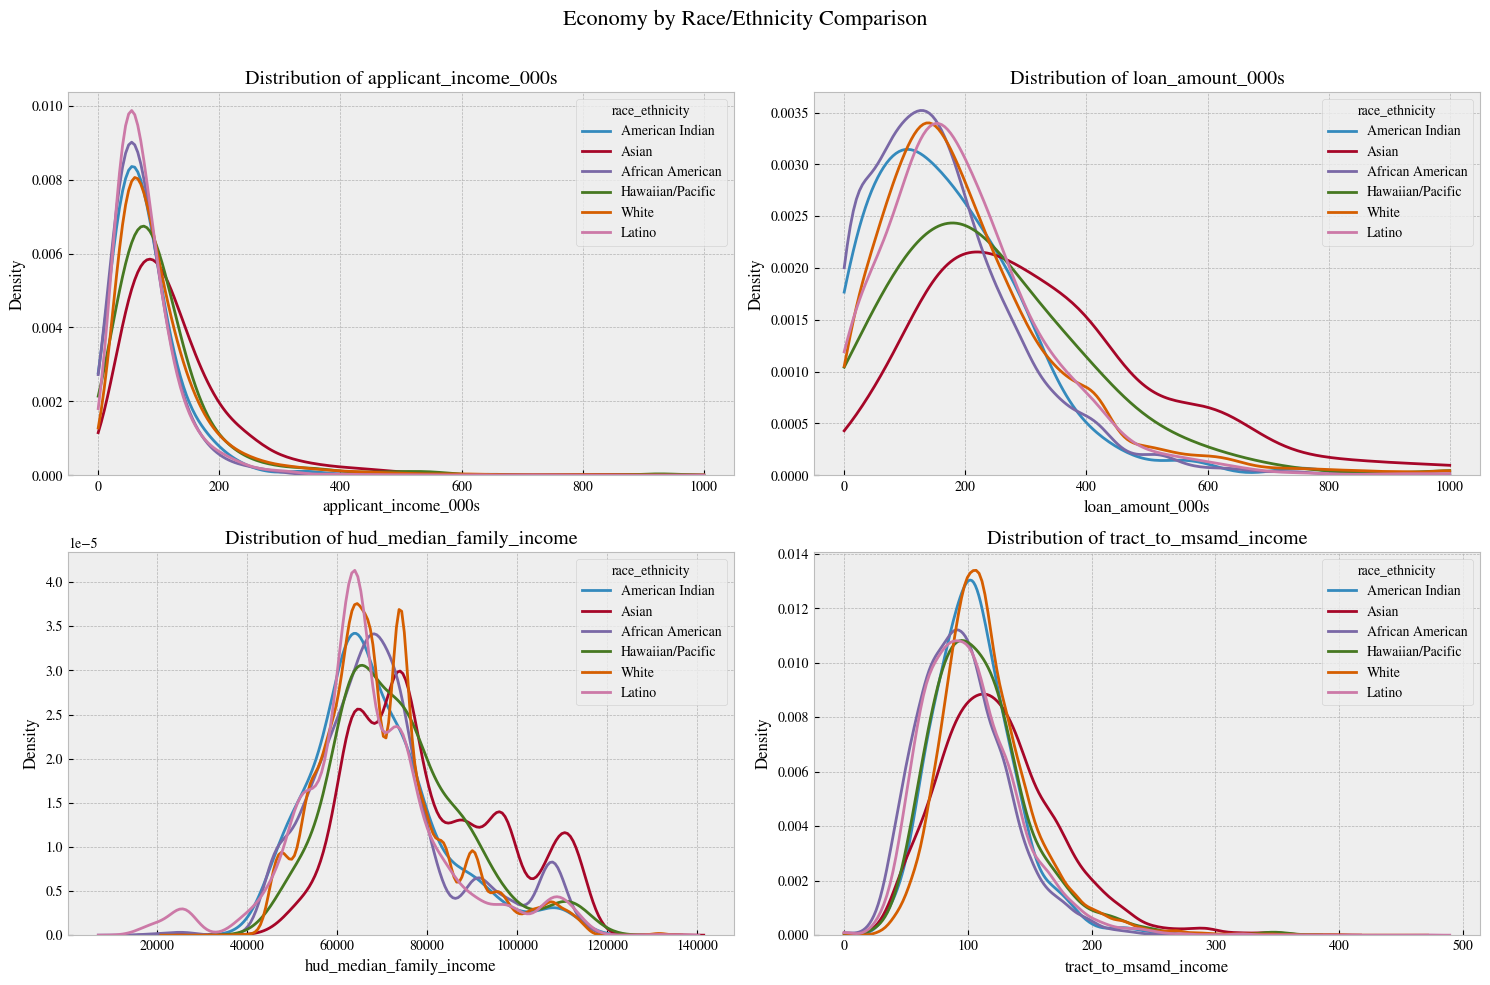

In [5]:
groups = [1, 2, 3, 4, 5, 9]
group_labels = ["American Indian", "Asian", "African American", "Hawaiian/Pacific", "White", "Latino"]
features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income', 'tract_to_msamd_income']

plot_density_differences(data, "race_ethnicity", groups, group_labels, features, title="Economy by Race/Ethnicity Comparison")

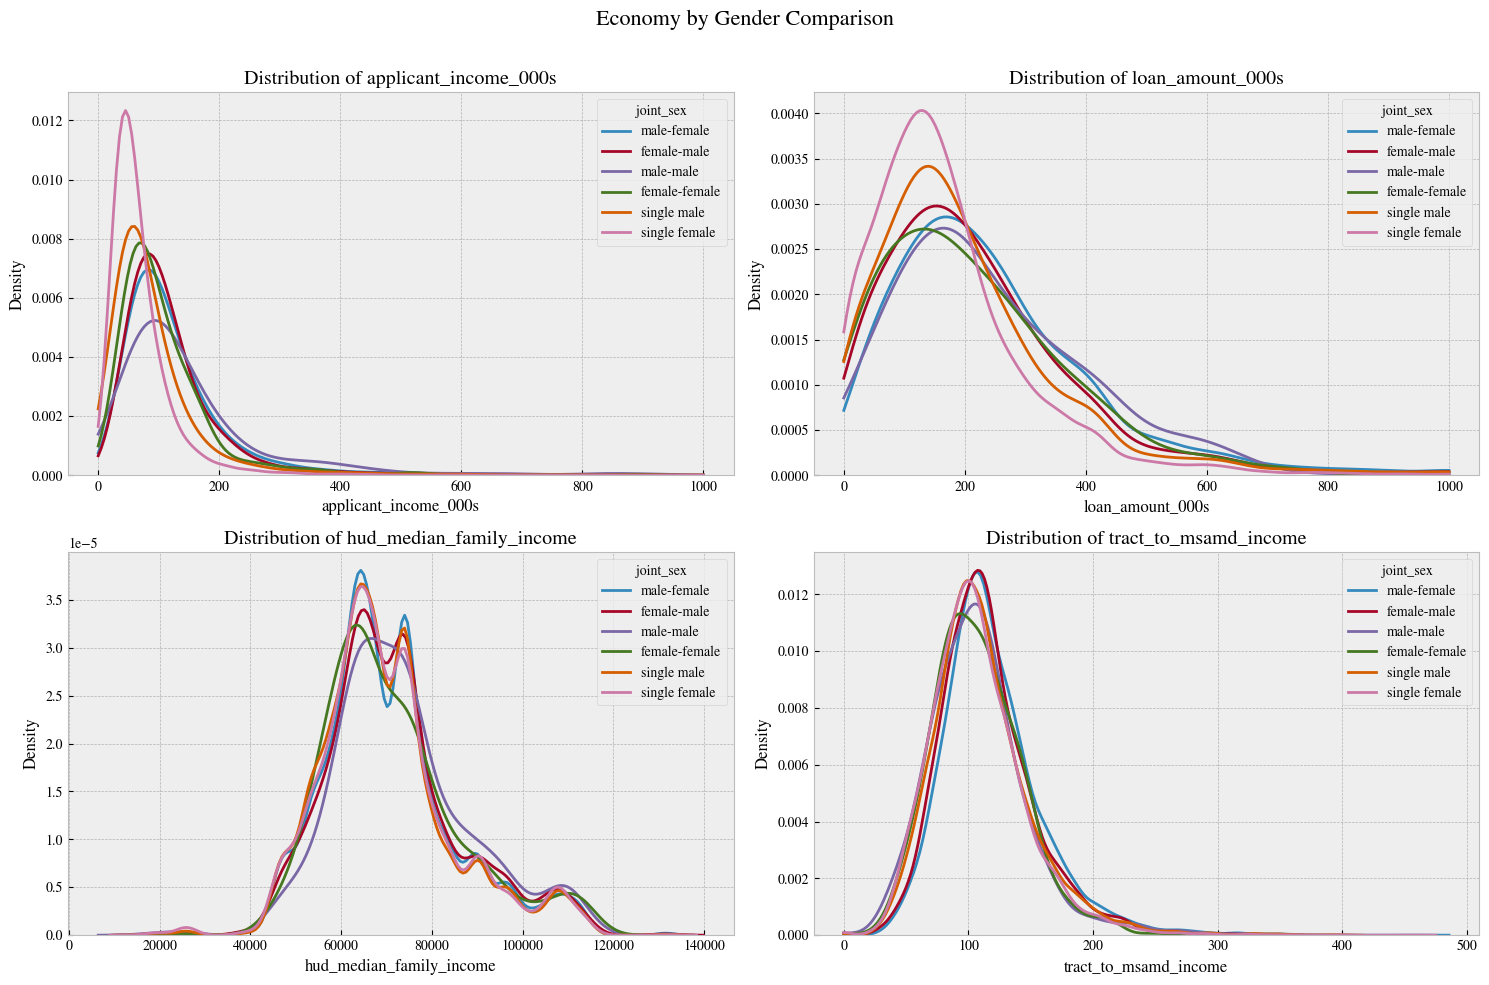

In [6]:
groups = ['1_2', '2_1', '1_1', '2_2', '1_5', '2_5']
group_labels = ["male-female", "female-male", "male-male", "female-female", "single male", "single female"]
features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income', 'tract_to_msamd_income']

plot_density_differences(data, "joint_sex", groups, group_labels, features, title="Economy by Gender Comparison")

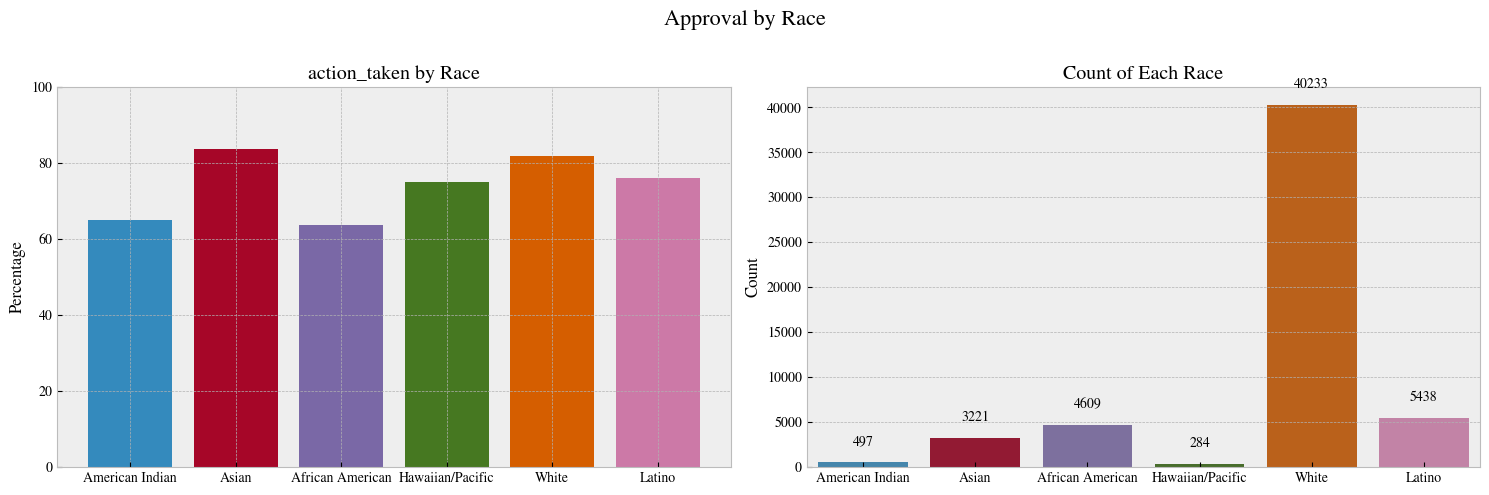

In [7]:
groups = [1, 2, 3, 4, 5, 9]
group_labels = ["American Indian", "Asian", "African American", "Hawaiian/Pacific", "White", "Latino"]
features = ['action_taken']

plot_histogram_differences(data, 'race_ethnicity', 'action_taken', groups, group_labels, features, title='Approval by Race')

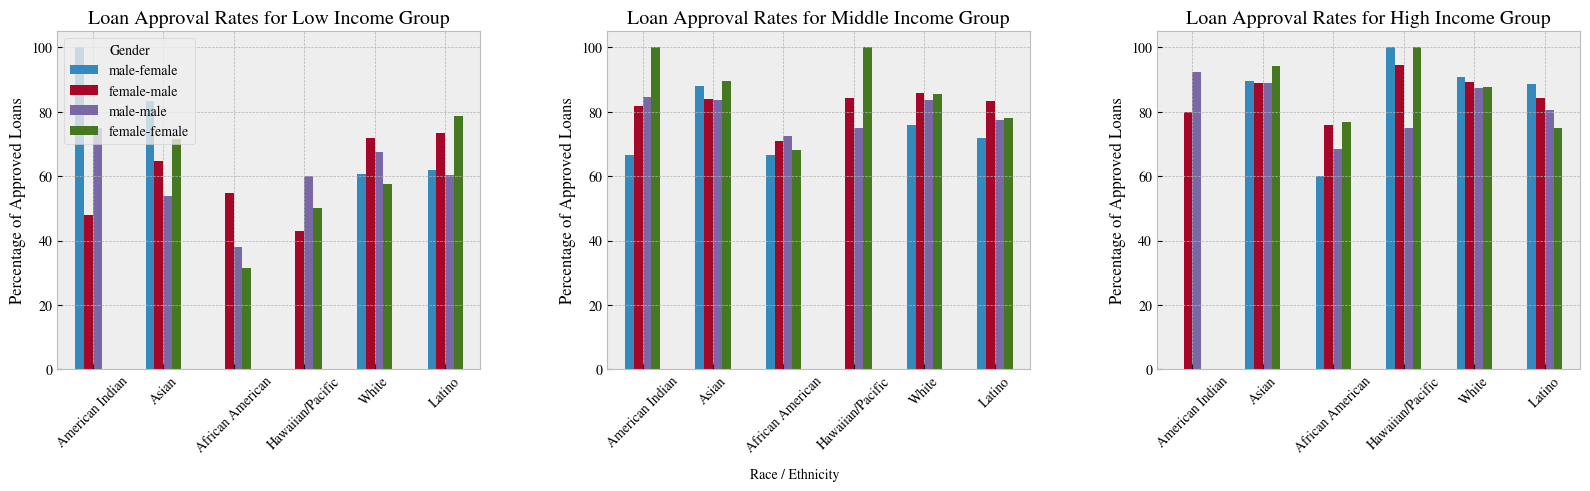

In [8]:
approval_rates(data)

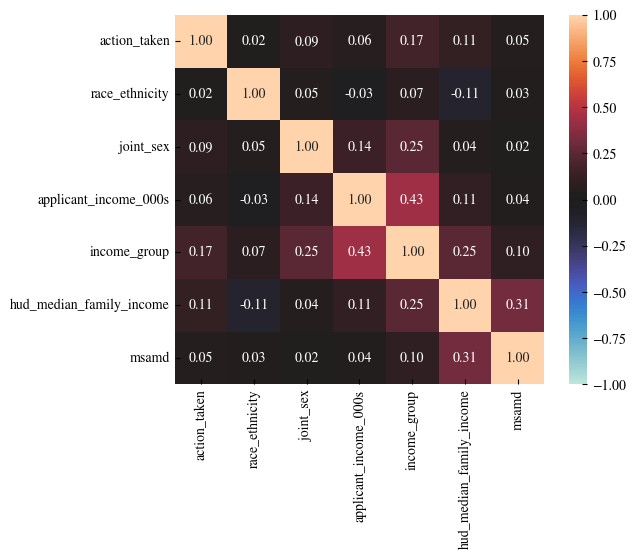

In [9]:
subset = data[["action_taken", "race_ethnicity", "joint_sex", "applicant_income_000s", "income_group", "hud_median_family_income", "msamd"]]
associations_df = associations(subset)

# Statistical Analysis

In [10]:
data = data_loader(None, num=100000, one_hot=False)

race_dict = {
    1: 'American Indian or Alaska Native',
    2: 'Asian',
    3: 'Black or African American',
    4: 'Native Hawaiian or Other Pacific Islander',
    5: 'White',
    9: 'White Latino'
}

def test_difference(data, races=[]):

    print(f"\nRaces: {races[0]}, {race_dict[races[0]]} & {races[1]}, {race_dict[races[1]]}")

    subset = data[data.race_ethnicity.isin(races)]
    cont_table = pd.crosstab(index=subset['action_taken'], columns=subset['race_ethnicity'])
    print(cont_table)

    # Perform the chi-square test
    stat, p_val, dof, exp_val = chi2_contingency(cont_table)
    print('Chi-square test statistic:', stat)
    print('P-value:', p_val)

Loading data...
processed_data.csv exists. Loading data from file.


In [11]:
# Create a contingency table of loan approval status, race, and income group
cont_table = pd.crosstab([data['action_taken'], data['race_ethnicity']],
                         data['income_group'])

# Print the contingency table
print(cont_table)

# Perform the chi-square test
stat, p_val, dof, exp_val = chi2_contingency(cont_table)
print('Chi-square test statistic:', stat)
print('P-value:', p_val)

income_group                  high   low  middle
action_taken race_ethnicity                     
Approved     1                  77   104     142
             2                1356   378     960
             3                 556  1027    1356
             4                  74    39     100
             5               11076  8281   13620
             9                 825  1473    1839
Denied       1                  19   103      52
             2                 199   156     173
             3                 204   902     566
             4                  11    29      31
             5                1567  3142    2553
             9                 177   675     450
Chi-square test statistic: 3018.9999930900904
P-value: 0.0


In [12]:
# Create a contingency table of loan approval status, race
cont_table = pd.crosstab(index=data['action_taken'], columns=data['income_group'])

# Print the contingency table
print(cont_table)

# Perform the chi-square test
stat, p_val, dof, exp_val = chi2_contingency(cont_table)
print('Chi-square test statistic:', stat)
print('P-value:', p_val)

income_group   high    low  middle
action_taken                      
Approved      13964  11302   18017
Denied         2177   5007    3825
Chi-square test statistic: 1659.7704673349608
P-value: 0.0


In [13]:
# Create a contingency table of loan approval status, race
cont_table = pd.crosstab(index=data['action_taken'], columns=data['race_ethnicity'])

# Print the contingency table
print(cont_table)

# Perform the chi-square test
stat, p_val, dof, exp_val = chi2_contingency(cont_table)
print('Chi-square test statistic:', stat)
print('P-value:', p_val)

race_ethnicity    1     2     3    4      5     9
action_taken                                     
Approved        344  2791  3189  230  34125  4290
Denied          184   553  1770   74   7566  1353
Chi-square test statistic: 991.6171837624283
P-value: 3.9238515855063924e-212


In [17]:
test_difference(data, races=[3, 5])


Races: 3, Black or African American & 5, White
race_ethnicity     3      5
action_taken               
Approved        3189  34125
Denied          1770   7566
Chi-square test statistic: 851.1329917693397
P-value: 4.12336460800081e-187


In [15]:
races = data.race_ethnicity.unique()

for race in races:

    print(f"Race: {race_dict[race]}")

    df = data.copy()
    df['X'] = [1 if r==race else 0 for r in data.race_ethnicity]

    cont_table = pd.crosstab(index=df['action_taken'], columns=df['X'])
    # Print the contingency table
    print(cont_table)

    # Perform the chi-square test
    stat, p_val, dof, exp_val = chi2_contingency(cont_table)
    print('Chi-square test statistic:', stat)
    print('P-value:', p_val)

Race: White
X                 0      1
action_taken              
Approved      10844  34125
Denied         3934   7566
Chi-square test statistic: 482.443191385253
P-value: 6.282224686108178e-107
Race: Black or African American
X                 0     1
action_taken             
Approved      41780  3189
Denied         9730  1770
Chi-square test statistic: 786.4918421642532
P-value: 4.666689928417099e-173
Race: White Latino
X                 0     1
action_taken             
Approved      40679  4290
Denied        10147  1353
Chi-square test statistic: 50.1733836377377
P-value: 1.40743934990406e-12
Race: Asian
X                 0     1
action_taken             
Approved      42178  2791
Denied        10947   553
Chi-square test statistic: 31.867506757186547
P-value: 1.6505528737502257e-08
Race: American Indian or Alaska Native
X                 0    1
action_taken            
Approved      44625  344
Denied        11316  184
Chi-square test statistic: 68.03962550722375
P-value: 1.60242

In [16]:
df_minorities = data[data.race_ethnicity.isin([1, 2, 3, 4, 9])]
races = df_minorities.race_ethnicity.unique()

for race in races:

    print(f"\nRace: {race}, {race_dict[race]}")

    df_minorities = df_minorities.copy()
    df_minorities['race'] = [1 if r==race else 0 for r in df_minorities.race_ethnicity]

    cont_table = pd.crosstab(index=df_minorities['action_taken'], columns=df_minorities['race'])
    # Print the contingency table
    print(cont_table)

    # Perform the chi-square test
    stat, p_val, dof, exp_val = chi2_contingency(cont_table)
    print('Chi-square test statistic:', stat)
    print('P-value:', p_val)


Race: 3, Black or African American
race             0     1
action_taken            
Approved      7655  3189
Denied        2164  1770
Chi-square test statistic: 313.75655810658736
P-value: 3.318175978531751e-70

Race: 9, White Latino
race             0     1
action_taken            
Approved      6554  4290
Denied        2581  1353
Chi-square test statistic: 32.452366973038515
P-value: 1.2215008700498524e-08

Race: 2, Asian
race             0     1
action_taken            
Approved      8053  2791
Denied        3381   553
Chi-square test statistic: 224.30089312889174
P-value: 1.0430121818029851e-50

Race: 1, American Indian or Alaska Native
race              0    1
action_taken            
Approved      10500  344
Denied         3750  184
Chi-square test statistic: 18.54206939657391
P-value: 1.6619526318529918e-05

Race: 4, Native Hawaiian or Other Pacific Islander
race              0    1
action_taken            
Approved      10614  230
Denied         3860   74
Chi-square test stat

# Explainability Analysis

In [ ]:
import pandas as pd
import shap
import torch
shap.initjs()

from LR_pt import LogisticRegression
from NN import SimpleNN

In [ ]:
data = data_loader(race_cols, num=100000, one_hot=True)
x_train, x_val, x_test, y_train, y_val , y_test, train_groups, val_groups, test_groups = preprocess(data, features, race_cols)
X = torch.from_numpy(x_test).float()
y = torch.from_numpy(np.array(y_test)).long().view(-1, 1)

X_fair_PCA, U, explained_variance = fair_PCA(x_train, n_components=x_train.shape[1], groups=train_groups)
x_test_pca = x_test @ U

## Loading models and inserting state

In [ ]:
# Loading logistic regression
model_lr_state = torch.load("../old_models/LRmodel_S:1000000_E:1000_F:True_L:1_G:0.1.pt")
model_lr = LogisticRegression(x_train.shape[1])
model_lr.weights = model_lr_state['linear.weight']
model_lr.bias = model_lr_state['linear.bias']

# Loading neural network
model_nn_state = torch.load("../models/NN_pca:False_E:100_lr:0.0001_bs:512.pt")
model_nn = SimpleNN(X.shape[1], 2)
model_nn.load_state_dict(model_nn_state)

# loading neural network with fair PCA
model_nn_fair_state = torch.load("../old_models/NN_pca:True_E:20_lr:0.001_bs:512.pt")
model_nn_fair = SimpleNN(X_fair_PCA.shape[1], 2)
model_nn_fair.load_state_dict(model_nn_fair_state)

In [ ]:
print(model_lr(X[0:10])) # 1st index
print(model_nn(X[0:10])) # 8th index
#print(model_nn_fair(X_fair_PCA[0:10]))

## Logistic Regression - SHAP Analysis

In [ ]:
X_np = X.detach().numpy()
explainer = shap.Explainer(model_lr, X_np, feature_names=clean_features)
shap_values_lr = explainer(X_np)

In [ ]:
# Individual instance shap vals
shap.plots.force(shap_values_lr[1])

In [ ]:
## Overall shap vals
# mean SHAP value for each feature
#shap.plots.bar(shap_values_lr[:,:6])
shap.summary_plot(shap_values_lr, X, feature_names=clean_features, plot_type='bar')

# Beeswarm plot
#shap.plots.beeswarm(shap_values_lr[:,:6])
shap.summary_plot(shap_values_lr, X, feature_names=clean_features)

## Neural Network - SHAP Analysis

In [ ]:
model_nn_state = torch.load("../models/NN_pca:False_E:100_lr:0.0001_bs:512.pt")
model_nn = SimpleNN(X.shape[1], 2)
model_nn.load_state_dict(model_nn_state)

In [ ]:
X_sub = X[:1000]
explainer_nn = shap.DeepExplainer(model_nn, X_sub)
shap_values_nn = explainer_nn.shap_values(X_sub)

In [ ]:
shap.force_plot(np.mean(y_test), shap_values_nn[1][8], feature_names=clean_features)

In [ ]:
shap.summary_plot(shap_values_nn[1], X_sub, feature_names=clean_features, plot_type='bar')
shap.summary_plot(shap_values_nn[1], X_sub, feature_names=clean_features)

## Neural Network FairPCA - SHAP Analysis

In [ ]:
x_fair = x_test_pca[:1000]
explainer_fair = shap.DeepExplainer(model_nn_fair, x_fair)
shap_values_fair = explainer_nn.shap_values(x_fair)

In [ ]:
shap.summary_plot(shap_values_fair, X_sub, feature_names=clean_features, plot_type='bar')
shap.summary_plot(shap_values_fair, X_sub, feature_names=clean_features)